In [1]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [2]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'sake_dataJ.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'icecream_chosa.txt') # Python 3 の場合

('icecream_chosa.txt', <http.client.HTTPMessage at 0x10deff710>)

In [3]:
df = pd.read_csv('icecream_chosa.txt', sep='\s', engine='python') # データの読み込み
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [23]:
df

,ID,gender,age,birth_order,frequency,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
0,1,2,20,2,5,7,7,8,3,9,...,7,9,3,3,9,7,8,8,1,7
1,2,2,21,2,1,7,8,9,9,9,...,4,7,8,9,9,4,7,7,8,9
2,3,2,21,3,2,7,4,3,3,6,...,4,6,3,3,6,7,3,7,3,3
3,4,2,21,4,3,9,6,6,5,8,...,4,9,5,4,8,9,1,2,1,3
4,5,2,21,4,2,9,5,7,5,6,...,6,6,6,5,9,6,6,6,9,1
5,6,2,21,2,5,5,7,5,5,5,...,5,9,5,8,8,9,9,5,9,1
6,7,2,21,2,2,9,7,6,3,7,...,6,7,5,5,9,9,3,5,2,3
7,8,2,20,2,4,7,7,6,8,7,...,5,6,7,9,5,6,8,5,6,8
8,9,2,21,2,4,7,7,4,8,7,...,5,7,7,6,8,6,3,3,7,3
9,10,2,22,4,4,5,5,9,5,8,...,8,7,2,8,8,6,6,2,1,1


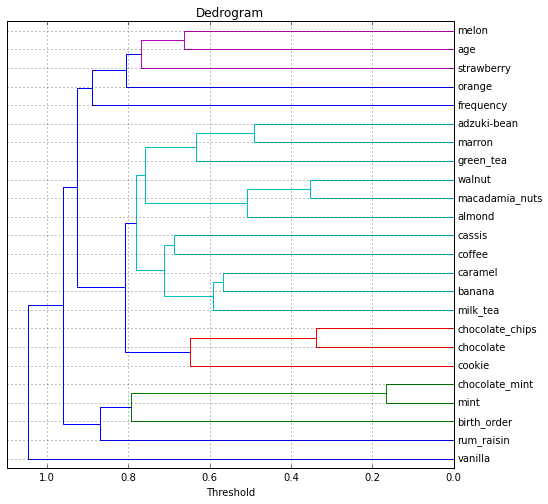

In [17]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
#y_labels.append("1")
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.iloc[:, 2:].T, 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
#dendrogram(result1, labels = list(df.iloc[:, 0:1]))
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df.columns), color_threshold=0.8)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

In [5]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sbnote_dataJt.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'sake_dataJ.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'sbnote_dataJt.txt') # Python 3 の場合

('sbnote_dataJt.txt', <http.client.HTTPMessage at 0x110340828>)

In [6]:
df = pd.read_csv('sbnote_dataJt.txt', sep='\s', engine='python') # データの読み込み
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

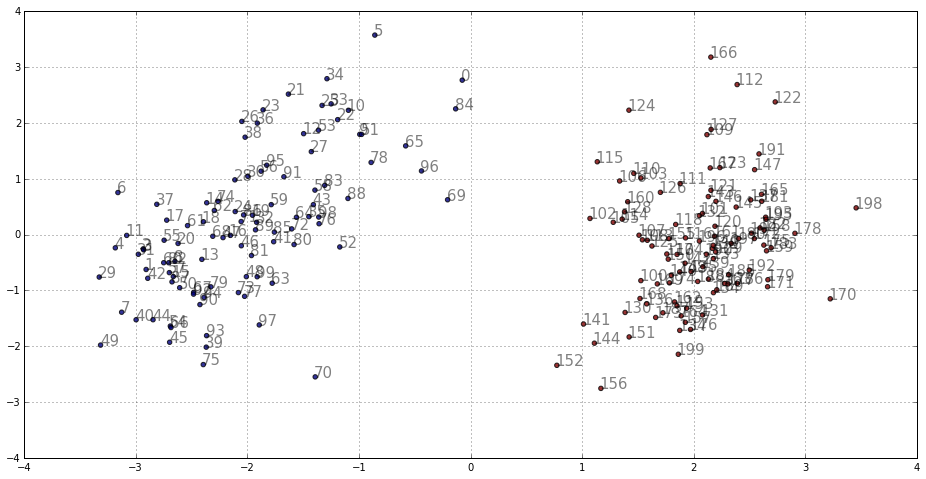

In [7]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(16, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=dfs['class'])
plt.grid()
plt.show()